In [54]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import minimize
from scipy.stats import crystalball, truncexpon, uniform, truncnorm


In [37]:
#define the functions using scipy stats
def g_s(X, beta, m, mu, sigma):
    return crystalball.pdf(X, beta, m, mu, sigma) / (crystalball.cdf(5.0, beta, m, mu, sigma) - crystalball.cdf(0.0, beta, m, mu, sigma))

def h_s(Y, lmbda):
    trunc_b = (10.0 - 0.0)*lmbda
    return truncexpon.pdf(Y, trunc_b, 0.0, 1/lmbda)

def g_b(X):
    return uniform.pdf(X, 0.0, 5.0)

def h_b(Y, mu_b, sigma_b):
    a = (mu_b - 0.0)/sigma_b
    b = (10.0 - mu_b)/sigma_b
    return truncnorm.pdf(Y, a, b, mu_b, sigma_b)

def marg_X(X, f, mu, sigma, beta, m):
    return f*g_s(X, beta, m, mu, sigma) + (1-f)*g_b(X)

def marg_Y(Y, f, lmbda, mu_b, sigma_b):
    return f*h_s (Y, lmbda) + (1-f)*h_b(Y, mu_b, sigma_b)

def signal(X, Y, mu, sigma, beta, m, f, lmbda):
    return f * g_s(X, beta, m, mu, sigma) * h_s(Y, lmbda)

def background(X, Y, f, mu_b, sigma_b):
    return (1-f) * g_b(X) * h_b(Y, mu_b, sigma_b)

def total(X, Y, mu, sigma, beta, m, f, lmbda, mu_b, sigma_b):
    return signal(X, Y, mu, sigma, beta, m, f, lmbda) + background(X, Y, f, mu_b, sigma_b)


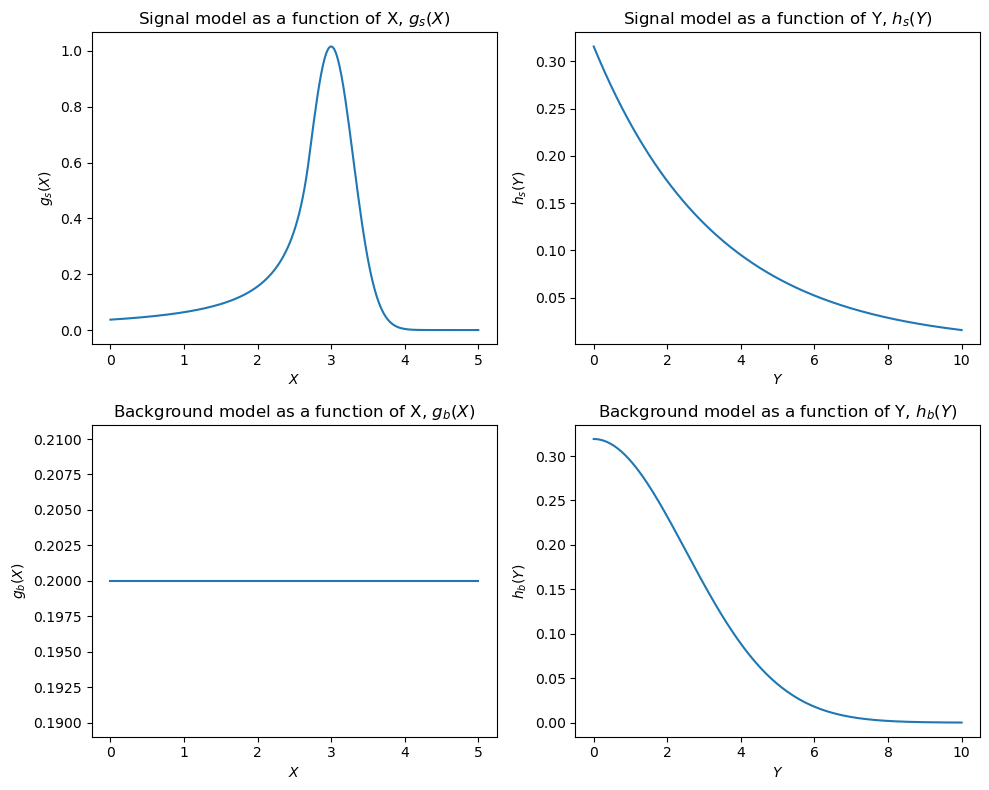

In [18]:
#Plot the graph
mu_true = 3.0
sigma_true = 0.3
beta_true = 1.0
m_true = 1.4
f_true = 0.6
lmbda_true = 0.3
mu_b_true = 0.0
sigma_b_true = 2.5

# Create a 2x2 grid of plots
fig, ax = plt.subplots(2, 2, figsize=(10, 8)) 

x = np.linspace(0, 5, 200)
y = np.linspace(0, 10, 200)

#plot the signal for X
ax[0,0].plot(x, g_s(x, beta_true, m_true, mu_true, sigma_true))
ax[0,0].set_title(r'Signal model as a function of X, $g_s(X)$')
ax[0,0].set_ylabel(r'$g_s(X)$')
ax[0,0].set_xlabel(r'$X$')

#plot the signal for Y
ax[0,1].plot(y, h_s(y, lmbda_true))
ax[0,1].set_title(r'Signal model as a function of Y, $h_s(Y)$')
ax[0,1].set_ylabel(r'$h_s(Y)$')
ax[0,1].set_xlabel(r'$Y$')

#plot the background for X
ax[1,0].plot(x, g_b(x))
ax[1,0].set_title(r'Background model as a function of X, $g_b(X)$')
ax[1,0].set_ylabel(r'$g_b(X)$')
ax[1,0].set_xlabel(r'$X$')

#plot the background for Y
ax[1,1].plot(y, h_b(y, mu_b_true, sigma_b_true))
ax[1,1].set_title(r'Background model as a function of Y, $h_b(Y)$')
ax[1,1].set_ylabel(r'$h_b(Y)$')
ax[1,1].set_xlabel(r'$Y$')

plt.tight_layout()

In [19]:
#Check that the pdfs are normalised

#change to arb params
mu = 4
sigma = 9
beta = 12
m = 12
f = 0.8
lmbda = 9
mu_b = 2
sigma_b = 3

integral_g_s = scipy.integrate.quad(lambda x: g_s(x, beta, m, mu, sigma), 0, 5)
integral_h_s = scipy.integrate.quad(lambda y: h_s(y, lmbda), 0, 10)
integral_g_b = scipy.integrate.quad(g_b, 0, 5)
integral_h_b = scipy.integrate.quad(lambda y: h_b(y, mu_b, sigma_b), 0, 10)

print(f'Integral of g_s is {integral_g_s[0]: 0.1f}, with error {integral_g_s[1]}.')
print(f'Integral of h_s is {integral_h_s[0]: 0.1f}, with error {integral_h_s[1]}.')
print(f'Integral of g_b is {integral_g_b[0]: 0.1f}, with error {integral_g_b[1]}.')
print(f'Integral of h_b is {integral_h_b[0]: 0.1f}, with error {integral_h_b[1]}.')


Integral of g_s is  1.0, with error 1.110223024625157e-14.
Integral of h_s is  1.0, with error 4.98081735191946e-13.
Integral of g_b is  1.0, with error 1.1102230246251569e-14.
Integral of h_b is  1.0, with error 4.109627083082046e-10.


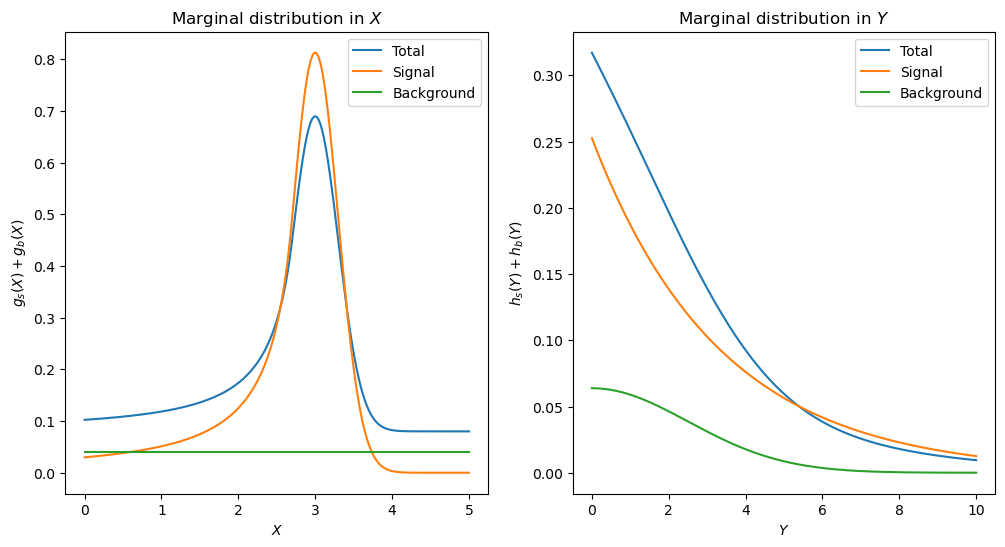

In [48]:
#Plot marginal distributions 
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
ax[0].plot(x, marg_X(x, f_true, mu_true, sigma_true, beta_true, m_true), label = 'Total')
ax[0].plot(x, f*g_s(x, beta_true, m_true, mu_true, sigma_true), label = 'Signal')
ax[0].plot(x, (1-f)*g_b(x), label = 'Background')
ax[0].set_xlabel(r'$X$')
ax[0].set_ylabel(r'$g_s(X)+g_b(X)$')
ax[0].set_title(r'Marginal distribution in $X$')
ax[0].legend()

ax[1].plot(y, marg_Y(y, f_true, lmbda_true, mu_b_true, sigma_b_true), label = 'Total')
ax[1].plot(y, f*h_s(y, lmbda_true), label = 'Signal')
ax[1].plot(y, (1-f)*h_b(y, mu_b_true, sigma_b_true), label = 'Background')
ax[1].set_xlabel(r'$Y$')
ax[1].set_ylabel(r'$h_s(Y)+h_b(Y)$')
ax[1].set_title(r'Marginal distribution in $Y$')
ax[1].legend()

Text(0.5, 1.0, 'Joint PDF')

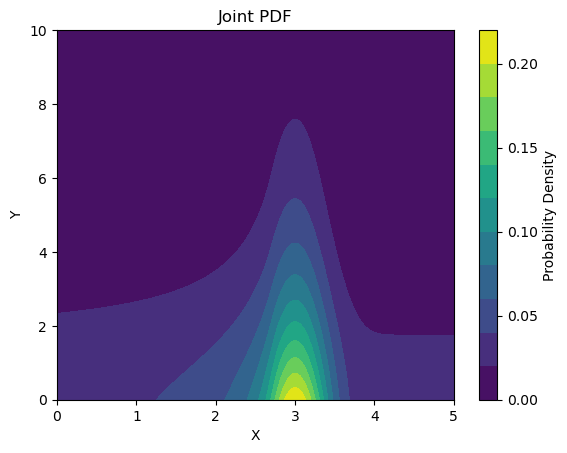

In [50]:
#Plot the total distribution for both X and Y

X, Y = np.meshgrid(x,y)

contour = plt.contourf(X, Y, total(X, Y, mu_true, sigma_true, beta_true, m_true, f_true, lmbda_true, mu_b_true, sigma_b_true), levels = 10, cmap = 'viridis')
cbar = plt.colorbar(contour)
cbar.set_label("Probability Density")
cbar.set_ticks([0, 0.05, 0.1, 0.15, 0.2])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Joint PDF')

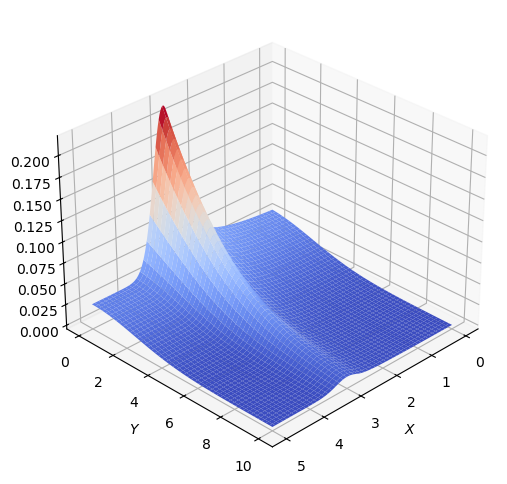

In [52]:
#Plot the 3d joint pdf
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
_ = ax.plot_surface(X, Y, total(X, Y, mu_true, sigma_true, beta_true, m_true, f_true, lmbda_true, mu_b_true, sigma_b_true), cmap='coolwarm' )
ax.view_init(elev=30, azim=45)

In [58]:
#Create accept-reject sampler
def find_fmax_2d(func, x_range = (0.0, 5.0), y_range = (0.0, 10.0)):
    f_to_min = lambda vars: -func(vars[0], vars[1])
    initial_guess = [0,1]
    result = minimize(f_to_min, x0 = initial_guess, bounds = [x_range, y_range])
    max_x, max_y = result.x
    max_f = func(max_x, max_y)
    return max_f

#Define total with fixed params
def total_fixed(X, Y):
    return total(
        X, Y, 
        mu=mu_true, sigma=sigma_true, beta=beta_true, m=m_true, 
        f=f_true, lmbda=lmbda_true, mu_b=mu_b_true, sigma_b=sigma_b_true
    )
f_max = find_fmax_2d(total_fixed)

In [63]:
#quicker accept reject sampler
def accept_reject_2d_quick(func, x_range = [0, 5], y_range = [0, 10], num_samples=50, seed=1, batch_size=1000):
    """
    Optimized 2D accept-reject sampler.
    
    Parameters:
        func (callable): The probability density function to sample from.
        f_max (float): Maximum value of func(x, y) over the specified range.
        x_range (tuple): The range (min, max) for x values.
        y_range (tuple): The range (min, max) for y values.
        num_samples (int): Number of samples to generate.
        seed (int): Random seed for reproducibility.
        batch_size (int): Number of points to generate in each batch.
    
    Returns:
        x_samples (np.ndarray): Array of x coordinates of accepted samples.
        y_samples (np.ndarray): Array of y coordinates of accepted samples.
    """
    np.random.seed(seed)
    
    x_samples = []
    y_samples = []

    f_max = find_fmax_2d(func)
    
    while len(x_samples) < num_samples:
        # Generate a batch of random samples
        x_temp = np.random.uniform(x_range[0], x_range[1], batch_size)
        y_temp = np.random.uniform(y_range[0], y_range[1], batch_size)
        f_temp = np.random.uniform(0, f_max, batch_size)
        
        # Evaluate the function for the batch
        f_values = func(x_temp, y_temp)
        
        # Apply the acceptance criterion
        accepted = f_temp < f_values
        
        # Append accepted samples
        x_samples.extend(x_temp[accepted])
        y_samples.extend(y_temp[accepted])
    
    # Convert lists to arrays and trim to the desired number of samples
    x_samples = np.array(x_samples[:num_samples])
    y_samples = np.array(y_samples[:num_samples])
    
    return x_samples, y_samples

In [65]:
total_pdf_sample = accept_reject_2d_quick(total_fixed,num_samples = 100000, seed = 100)
np.savetxt('data_storage/joint_pdf_sample_s100.csv', total_pdf_sample, delimiter=',', header = 'X,Y', comments = '')